In [1]:
import cv2
import os
from utils.coco.coco import COCO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_image_into_numpy_array(filename):
    try:
        image = Image.open(filename)
    except FileNotFoundError:
        print("file not found!")
        return None
  
    try:  
        (im_width, im_height) = image.size

        return np.array(image.getdata()).reshape(
            (im_height, im_width, 3)).astype(np.uint8)
    except ValueError:
        print("ValueError")
        return None

In [3]:

eval_caption_file='/home/zisang/Documents/code/data/mscoco/raw-data/annotations/captions_val2014.json'
eval_result_file='./val/results.json'
eval_image_dir='/home/zisang/Documents/code/data/mscoco/raw-data/val2014'
batch_size=1

In [4]:
""" Prepare the data for evaluating the model. """
coco_gt = COCO(eval_caption_file)
coco_re = coco_gt.loadRes(eval_result_file)

loading annotations into memory...
Done (t=0.81s)
creating index...
index created!
Loading and preparing results...     
DONE (t=0.14s)
creating index...
index created!


In [5]:
# show these captions
imgIds = coco_gt.getImgIds()
idx=200

gts: [{'image_id': 513681, 'id': 311795, 'caption': 'a man in a safety vest holds him arms up as he stands in front of an airplane.'}, {'image_id': 513681, 'id': 313523, 'caption': 'an airport employee giving directions to an airplane.'}, {'image_id': 513681, 'id': 315407, 'caption': 'an air traffic controller directing an airplane on a busy runway.'}, {'image_id': 513681, 'id': 316505, 'caption': 'a person reflective gear directing an airplane .'}, {'image_id': 513681, 'id': 318242, 'caption': 'a person directing a white jet airliner with orange sticks.'}]
res: [{'image_id': 513681, 'caption': 'a plane that is parked on a runway.', 'id': 145}]


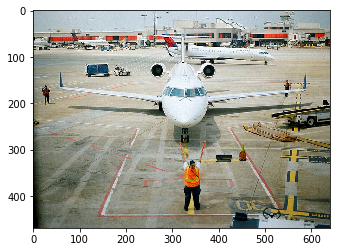

In [55]:
imgId = imgIds[idx]
gts = coco_gt.imgToAnns[imgId]
res = coco_re.imgToAnns[imgId]
print("gts:",gts)
print("res:",res)
image_file = os.path.join(eval_image_dir,
                        coco_gt.imgs[imgId]['file_name'])
# print(image_file)
image = load_image_into_numpy_array(image_file)
# #     plt.figure(figsize=(16,8))
plt.imshow(image)  
idx+=1

In [56]:
import shutil
import json
export = [{"folder":"with_ground_truth","imgIds":[12448,337264,387362]},
         {"folder":"more_example","imgIds":[513681,296649,271177,293802,113588,174482,294832,324266,509822,81922,37675]},
         {"folder":"wrong_object","imgIds":[281533,579664,386912,510755,386164,268556]},
         {"folder":"wrong_counting","imgIds":[503707,5802,87038]},
         {"folder":"wrong_action","imgIds":[79472,97434]},
         {"folder":"wrong_position","imgIds":[372938]},
         {"folder":"wrong_repeating","imgIds":[437218,368402]},]
# imgIds = 
for item in export:
    results = []
    d = 'vis_captions/'+item["folder"]+'/'
    if not os.path.exists(d):
        os.makedirs(d)

    for imgId in item["imgIds"]:
        gts = coco_gt.imgToAnns[imgId]
        gts = [info['caption'] for info in gts]
        res = coco_re.imgToAnns[imgId]
        res = [info['caption'] for info in res]
        filename = coco_gt.imgs[imgId]['file_name']
        image_file = os.path.join(eval_image_dir,filename)
        shutil.copyfile(image_file,os.path.join(d,filename))
        results.append({'filename': filename,
                        'gts': gts,
                        'res': res})
    fp = open(d+'captions.json', 'w')
    json.dump(results, fp)
    fp.close()